# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city # YOUR CODE HERE
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather_data = requests.get(city_url).json()
    #pprint(city_weather_data)
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather_data # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | moose jaw
Processing Record 3 of Set 1 | mahibadhoo
Processing Record 4 of Set 1 | novodvinsk
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | nishinoomote
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tommot
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | ndele
Processing Record 21 of Set 1 | hadibu
Processing Record 22 of Set 1 | colonia 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.18,77,100,3.73,PN,1701330565
1,moose jaw,50.4001,-105.5344,-4.86,80,10,5.14,CA,1701330566
2,mahibadhoo,3.7833,72.9667,28.39,72,41,2.45,MV,1701330566
3,novodvinsk,64.4165,40.8122,-7.14,98,66,1.83,RU,1701330566
4,port-aux-francais,-49.3500,70.2167,2.47,84,64,20.08,TF,1701330439


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.18,77,100,3.73,PN,1701330565
1,moose jaw,50.4001,-105.5344,-4.86,80,10,5.14,CA,1701330566
2,mahibadhoo,3.7833,72.9667,28.39,72,41,2.45,MV,1701330566
3,novodvinsk,64.4165,40.8122,-7.14,98,66,1.83,RU,1701330566
4,port-aux-francais,-49.3500,70.2167,2.47,84,64,20.08,TF,1701330439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

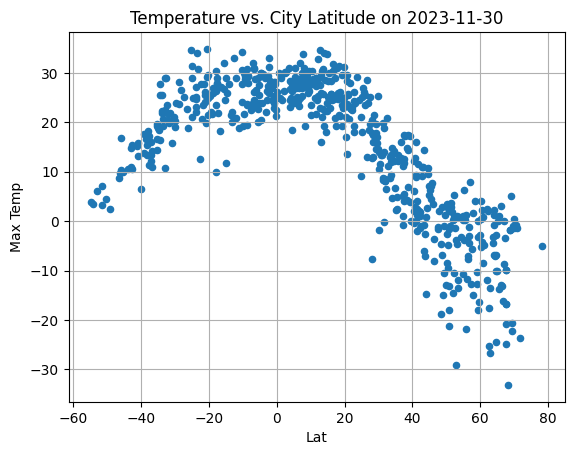

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
formatted_date = city_data_df['Date'].max().strftime('%Y-%m-%d')

city_data_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", 
                                      title = "Temperature vs. City Latitude on " + formatted_date)
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

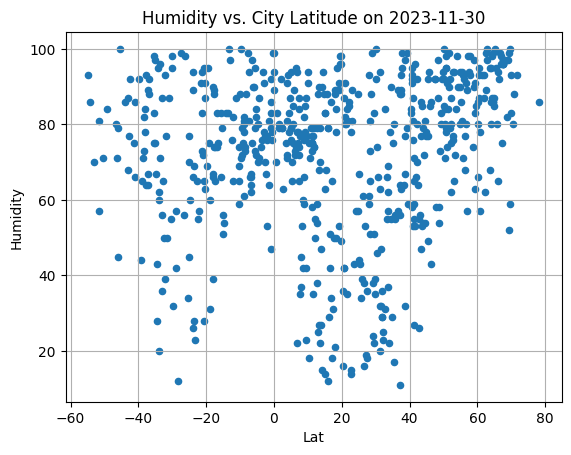

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind = "scatter", x = "Lat", y = "Humidity", 
                                      title = "Humidity vs. City Latitude on " + formatted_date)
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

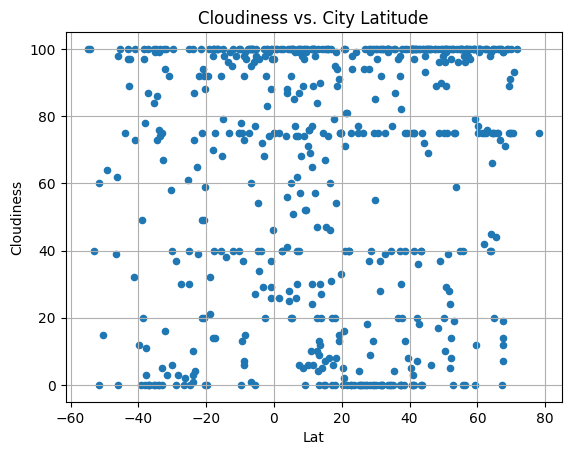

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", 
                                      title = "Cloudiness vs. City Latitude")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

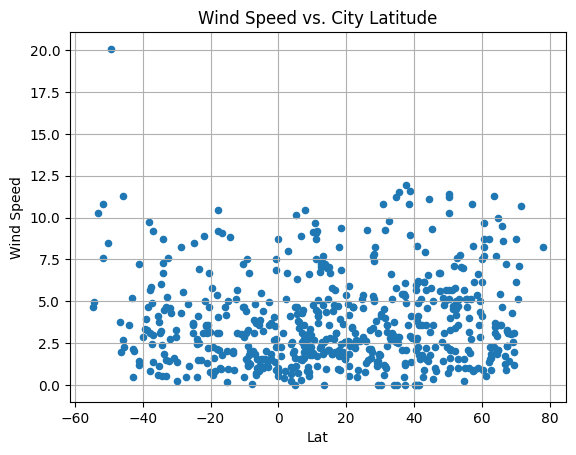

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", 
                                      title = "Wind Speed vs. City Latitude")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def createLinearRegressionPlot(df, x_column, y_column, filename):
    #first, perform the linear regression on the data
    x_values = df[x_column]
    y_values = df[y_column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    myplot = df.plot(kind='scatter', x=x_column, y=y_column)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values), min(y_values)),fontsize=15,color="red")
    plt.grid(True)
    plt.show()
    plt.savefig(filename)
    
    print(f"The r-value is {round(rvalue,2)}")
    return myplot

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,moose jaw,50.4001,-105.5344,-4.86,80,10,5.14,CA,2023-11-30 07:49:26
2,mahibadhoo,3.7833,72.9667,28.39,72,41,2.45,MV,2023-11-30 07:49:26
3,novodvinsk,64.4165,40.8122,-7.14,98,66,1.83,RU,2023-11-30 07:49:26
5,nishinoomote,30.7333,131.0000,13.31,66,75,10.80,JP,2023-11-30 07:49:27
6,wailua homesteads,22.0669,-159.3780,22.44,86,40,4.63,US,2023-11-30 07:49:27


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.18,77,100,3.73,PN,2023-11-30 07:49:25
4,port-aux-francais,-49.3500,70.2167,2.47,84,64,20.08,TF,2023-11-30 07:47:19
7,codrington,-38.2667,141.9667,15.50,73,97,9.73,AU,2023-11-30 07:49:28
9,ushuaia,-54.8000,-68.3000,3.81,93,100,4.63,AR,2023-11-30 07:47:03
11,fale old settlement,-9.3852,-171.2468,29.32,72,13,7.51,TK,2023-11-30 07:49:29


###  Temperature vs. Latitude Linear Regression Plot

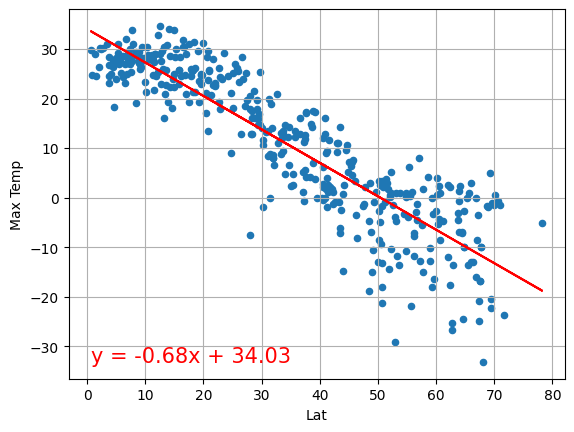

The r-value is -0.89


<Axes: xlabel='Lat', ylabel='Max Temp'>

<Figure size 640x480 with 0 Axes>

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(northern_hemi_df, "Lat", "Max Temp", "output_data/Northern_Hemi_Temp_vs_Lat.png")

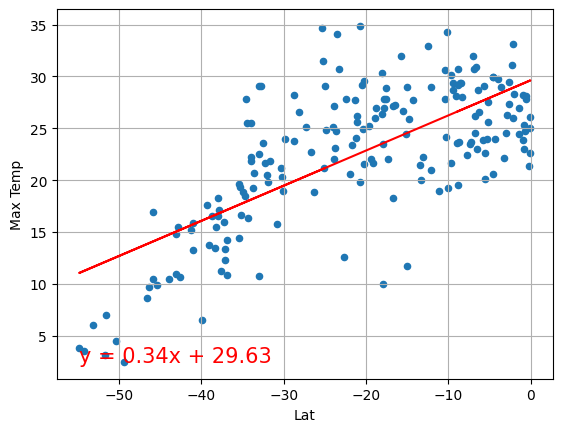

The r-value is 0.71


<Axes: xlabel='Lat', ylabel='Max Temp'>

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(southern_hemi_df, "Lat", "Max Temp", "output_data/Southern_Hemi_Temp_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

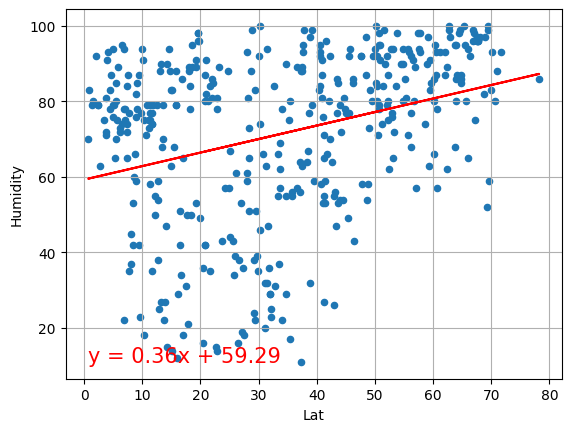

The r-value is 0.32


<Axes: xlabel='Lat', ylabel='Humidity'>

<Figure size 640x480 with 0 Axes>

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(northern_hemi_df, "Lat", "Humidity", "output_data/Northern_Hemi_Humidity_vs_Lat.png")

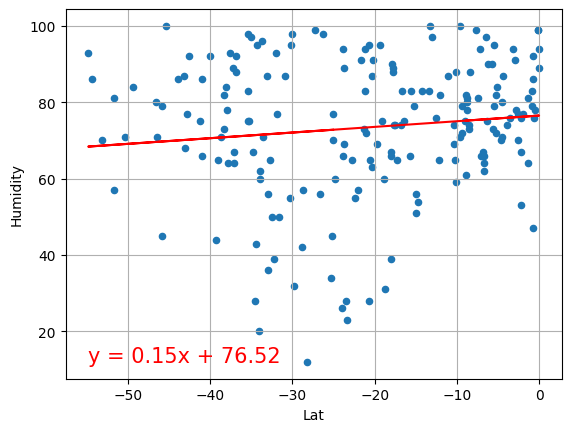

The r-value is 0.12


<Axes: xlabel='Lat', ylabel='Humidity'>

<Figure size 640x480 with 0 Axes>

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(southern_hemi_df, "Lat", "Humidity", "output_data/Southern_Hemi_Humidity_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

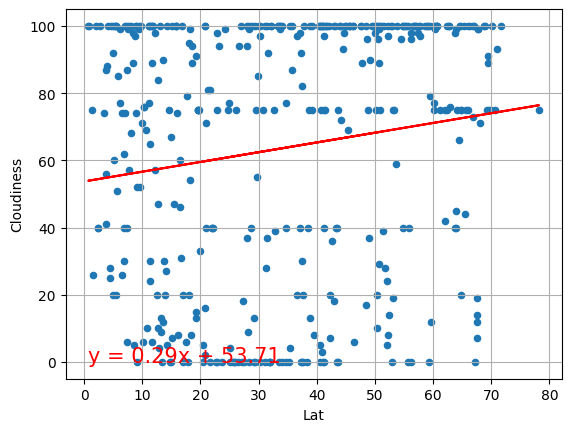

The r-value is 0.15


<Axes: xlabel='Lat', ylabel='Cloudiness'>

<Figure size 640x480 with 0 Axes>

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(northern_hemi_df, "Lat", "Cloudiness", "output_data/Northern_Hemi_Cloudiness_vs_Lat.png")

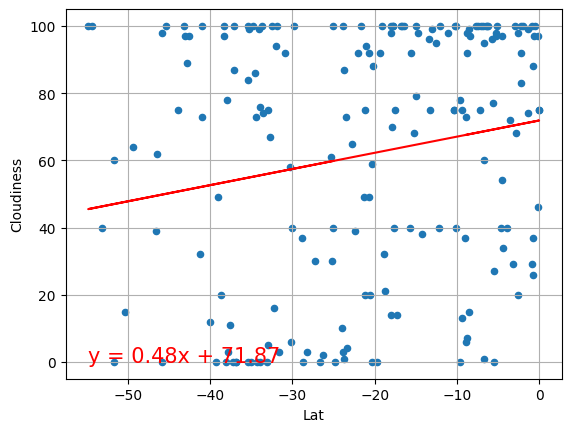

The r-value is 0.19


<Axes: xlabel='Lat', ylabel='Cloudiness'>

<Figure size 640x480 with 0 Axes>

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(southern_hemi_df, "Lat", "Cloudiness", "output_data/Southern_Hemi_Cloudiness_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

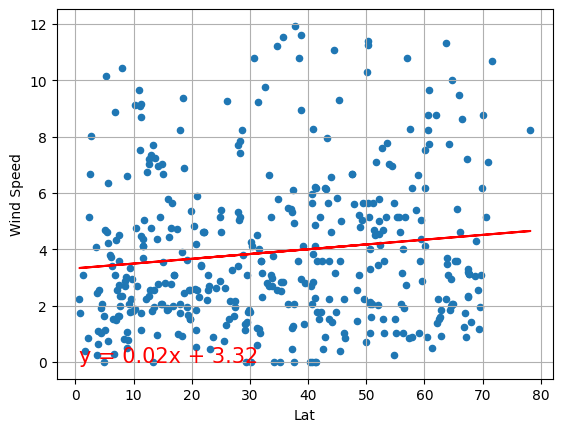

The r-value is 0.13


<Axes: xlabel='Lat', ylabel='Wind Speed'>

<Figure size 640x480 with 0 Axes>

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(northern_hemi_df, "Lat", "Wind Speed", "output_data/Northern_Hemi_WindSpeed_vs_Lat.png")

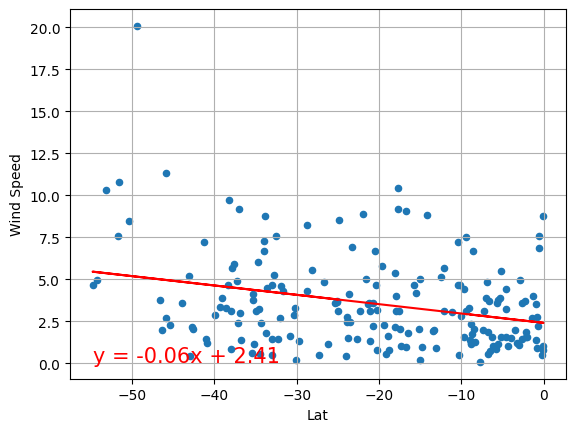

The r-value is -0.29


<Axes: xlabel='Lat', ylabel='Wind Speed'>

<Figure size 640x480 with 0 Axes>

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
createLinearRegressionPlot(southern_hemi_df, "Lat", "Wind Speed", "output_data/Southern_Hemi_WindSpeed_vs_Lat.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE